In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
## Testing 
data_measure_df = pd.read_sql("SELECT * FROM Measurement", conn)
data_station_df = pd.read_sql("SELECT * FROM Station", conn)

In [7]:
## Testing Do I need this?
print(data_measure_df.head())
print(data_measure_df.shape)

   id      station        date  prcp  tobs
0   0  USC00519397  2010-01-01   2.0  18.3
1   1  USC00519397  2010-01-02   0.0  17.2
2   2  USC00519397  2010-01-03   0.0  23.3
3   3  USC00519397  2010-01-04   0.0  24.4
4   4  USC00519397  2010-01-06   NaN  22.8
(19550, 5)


In [8]:
## Testing  Do I need this?
print(data_station_df.head())
print(data_station_df.shape)

   id      station                                    name  latitude  \
0   0  USC00519397                    WAIKIKI 717.2, HI US   21.2716   
1   1  USC00513117                    KANEOHE 838.1, HI US   21.4234   
2   2  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US   21.5213   
3   3  USC00517948                       PEARL CITY, HI US   21.3934   
4   4  USC00518838              UPPER WAHIAWA 874.3, HI US   21.4992   

   longitude  elevation  
0  -157.8168      0.914  
1  -157.8015      4.450  
2  -157.8374      2.133  
3  -157.9751      3.627  
4  -158.0111     93.447  
(9, 6)


In [9]:
## Testing Do I need this?
combined_df = pd.merge(data_measure_df, data_station_df, on="station", how="inner")
combined_df.head()
print(combined_df.shape)

(19550, 10)


In [10]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [14]:
## Testing Do I need this?
data_measure_df = engine.execute("SELECT * FROM Measurement")

for record in data_measure_df:
    print(record)

(0, 'USC00519397', '2010-01-01', 2.0, 18.3)
(1, 'USC00519397', '2010-01-02', 0.0, 17.2)
(2, 'USC00519397', '2010-01-03', 0.0, 23.3)
(3, 'USC00519397', '2010-01-04', 0.0, 24.4)
(4, 'USC00519397', '2010-01-06', None, 22.8)
(5, 'USC00519397', '2010-01-07', 1.5, 21.1)
(6, 'USC00519397', '2010-01-08', 0.0, 17.8)
(7, 'USC00519397', '2010-01-09', 0.0, 20.0)
(8, 'USC00519397', '2010-01-10', 0.0, 22.8)
(9, 'USC00519397', '2010-01-11', 0.3, 17.8)
(10, 'USC00519397', '2010-01-12', 0.0, 16.1)
(11, 'USC00519397', '2010-01-14', 0.0, 18.9)
(12, 'USC00519397', '2010-01-15', 0.0, 18.3)
(13, 'USC00519397', '2010-01-16', 0.0, 20.0)
(14, 'USC00519397', '2010-01-17', 0.0, 17.8)
(15, 'USC00519397', '2010-01-18', 0.0, 22.2)
(16, 'USC00519397', '2010-01-19', 0.0, 18.9)
(17, 'USC00519397', '2010-01-20', 0.0, 18.9)
(18, 'USC00519397', '2010-01-21', 0.0, 20.6)
(19, 'USC00519397', '2010-01-22', 0.0, 19.4)
(20, 'USC00519397', '2010-01-23', 0.0, 19.4)
(21, 'USC00519397', '2010-01-24', 0.3, 21.7)
(22, 'USC00519397',

In [15]:
## Testing Do I need this?
#data_station_df = engine.execute("SELECT * FROM Station")

#for record in data_station_df:
#    print(record)

# Exploratory Precipitation Analysis

In [16]:
combined_df['date'].max()

'2017-08-23'

In [17]:
# Find the most recent date in the data set.  Need to add f string
last_date = combined_df['date'].max()
print(combined_df['date'].max())
#print(combined_df['date'].min())
#print(combined_df['date'].count())
#last_date

2017-08-23


In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

st_query_date = dt.date(2017, 8, 23) - dt.timedelta(days=364)
print("Start query date:", st_query_date)

Start query date: 2016-08-24


In [19]:
st_query_date

datetime.date(2016, 8, 24)

In [20]:
# Perform a query to retrieve the data andprecipition scores.

last_years_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > st_query_date).all()

last_years_data

[('2016-08-25', 2.0),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.3),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 3.3),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.8),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 1.3),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.8),
 ('2016-09-10', 0.0),
 ('2016-09-11', 1.3),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.5),
 ('2016-09-14', 33.5),
 ('2016-09-15', 10.7),
 ('2016-09-16', 1.5),
 ('2016-09-17', 1.3),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.5),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 1.5),
 ('2016-09-27', 0.5),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08', 0.0),
 ('201

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
query_df = pd.DataFrame(last_years_data, columns=['date', 'prcp'])
query_df.set_index('date', inplace=False)
query_df.head(3)

,date,prcp
0,2016-08-25,2.0
1,2016-08-26,0.0
2,2016-08-27,0.0


In [22]:
# Sort the dataframe by date

sort_query_df = query_df.sort_values('date',ascending=True)
sort_query_df

,date,prcp
0,2016-08-25,2.0
1003,2016-08-25,0.0
1519,2016-08-25,1.5
700,2016-08-25,0.0
359,2016-08-25,2.0
...,...,...
2214,2017-08-22,12.7
1002,2017-08-23,0.0
358,2017-08-23,0.0
1518,2017-08-23,2.0


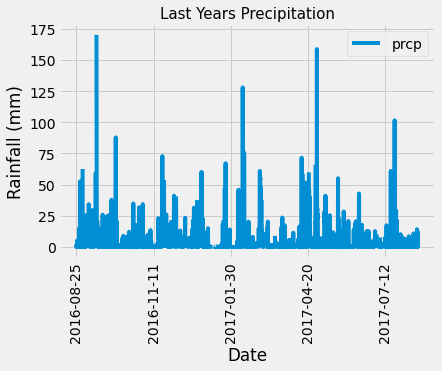

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data - Still wrong

sort_query_df.plot(x = "date", y = "prcp", legend = True, rot = 90)

plt.title(("Last Years Precipitation"), fontsize=15)
plt.xlabel("Date") 
plt.ylabel("Rainfall (mm)")

plt.show()



In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
query_df['prcp'].describe()

count    2009.000000
mean        4.380587
std        11.500884
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number stations in the dataset
from sqlalchemy import distinct

no_stations = session.query(Station.station).\
        group_by(Station.station).all()
no_stations



[('USC00511918',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00516128',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519281',),
 ('USC00519397',),
 ('USC00519523',)]

In [26]:
from sqlalchemy import distinct

no_stations1 = session.query(func.count(distinct(Station.station)))
print(no_stations1.all())

[(9,)]


In [34]:
# Design a query to find the most active stations (i.e. what stations with the most rows?)
# List the stations and the counts in descending order.

sel = [Measurement.station,
        func.count(Measurement.station)]
station_records = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_records

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.tobs, 
       func.max(Measurement.tobs), 
       func.min(Measurement.tobs), 
       func.avg(Measurement.tobs)]
most_active = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
most_active


[(12.2, 29.4, 12.2, 22.03582251082252)]

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
station_tobs_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > st_query_date).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()   # Sort the dataframe by date
station_tobs_data
    

[('2016-08-25', 26.7),
 ('2016-08-26', 26.7),
 ('2016-08-27', 23.9),
 ('2016-08-28', 22.8),
 ('2016-08-29', 25.6),
 ('2016-08-30', 25.0),
 ('2016-08-31', 25.6),
 ('2016-09-01', 26.7),
 ('2016-09-02', 26.7),
 ('2016-09-03', 25.6),
 ('2016-09-04', 25.6),
 ('2016-09-05', 25.6),
 ('2016-09-06', 22.8),
 ('2016-09-07', 23.3),
 ('2016-09-08', 26.7),
 ('2016-09-09', 26.1),
 ('2016-09-10', 25.0),
 ('2016-09-11', 26.7),
 ('2016-09-12', 24.4),
 ('2016-09-13', 26.1),
 ('2016-09-14', 23.9),
 ('2016-09-15', 26.1),
 ('2016-09-16', 25.6),
 ('2016-09-17', 26.1),
 ('2016-09-18', 25.6),
 ('2016-09-19', 25.6),
 ('2016-09-20', 24.4),
 ('2016-09-21', 23.3),
 ('2016-09-22', 25.0),
 ('2016-09-23', 25.6),
 ('2016-09-24', 26.1),
 ('2016-09-25', 26.1),
 ('2016-09-26', 25.0),
 ('2016-09-27', 26.7),
 ('2016-09-28', 25.6),
 ('2016-09-29', 25.6),
 ('2016-09-30', 25.6),
 ('2016-10-01', 25.0),
 ('2016-10-02', 26.1),
 ('2016-10-03', 26.1),
 ('2016-10-04', 26.1),
 ('2016-10-05', 26.1),
 ('2016-10-06', 23.9),
 ('2016-10-

In [37]:
# Save the query results as a Pandas DataFrame and set the index to the date column
tobs_query_df = pd.DataFrame(station_tobs_data, columns=['date', 'tobs'])
tobs_query_df.set_index('date', inplace=False)
tobs_query_df.head(20)

,date,tobs
0,2016-08-25,26.7
1,2016-08-26,26.7
2,2016-08-27,23.9
3,2016-08-28,22.8
4,2016-08-29,25.6
5,2016-08-30,25.0
6,2016-08-31,25.6
7,2016-09-01,26.7
8,2016-09-02,26.7
9,2016-09-03,25.6


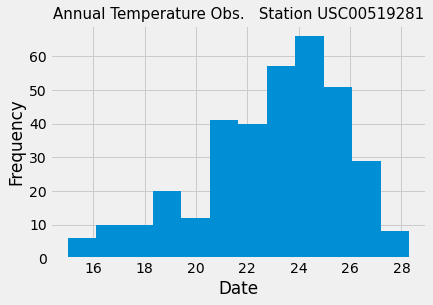

In [38]:
# And plot the results as a histogram

plt.hist(tobs_query_df['tobs'], bins=12)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Annual Temperature Obs.   Station USC00519281", fontsize=15)
plt.show()


# Close session

In [39]:
# Close Session
session.close()